In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.linear_model as linmod

In [2]:
afmdata=np.genfromtxt('100-0_72_NW-003')
afmdata= afmdata*(10**9)
height, width = afmdata.shape
afmimg=np.zeros((height, width, 3))

In [3]:
factor=(255)/(afmdata.max()-afmdata.min())
for i in range(height):
    for j in range(width):
        intensity=np.int((afmdata[i][j]-afmdata.min())*factor)
        #afmimg[i][j]=np.array([np.int((afmdata[i][j]-afmdata.min())*factor),0,0])
        afmimg[i][j]=np.array([intensity, intensity, intensity])

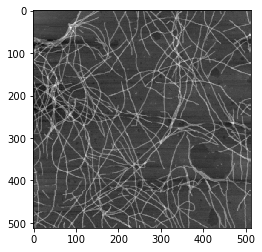

In [4]:
plt.imshow(np.uint8(afmimg))

(<matplotlib.axes._subplots.AxesSubplot at 0x11471ac50>,
 <matplotlib.image.AxesImage at 0x1147aa090>)

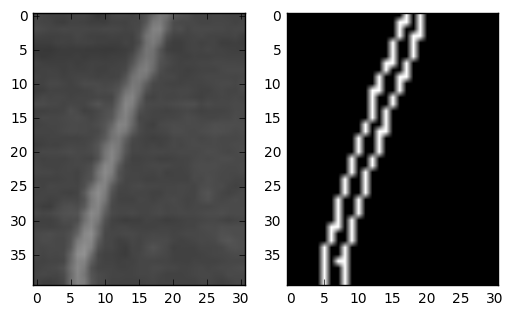

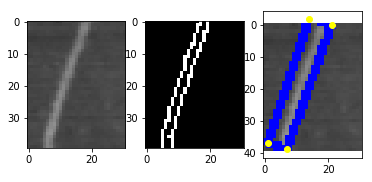

In [5]:
# Cropping out the part that we are interesting in
snip11=np.uint8(afmimg[300:400,300:400][20:60,19:50])
# Plotting the image that is interesting to us
plt.subplot(131),plt.imshow(snip11)

# Detecting borders using the Canny algorithm - setting thresholds 
# From the image information - background ~ 69, wire ~100
edges = cv2.Canny(snip11,69,100)
plt.subplot(132),plt.imshow(edges,cmap='gray')
# Locating contours
ret,thresh = cv2.threshold(snip11,80,255,cv2.THRESH_BINARY)

thresh=cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
derp, contours, hierarchy =cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(cnts)
box = cv2.boxPoints(rect)
box = np.int0(box)
hello=cv2.drawContours(snip11,[box],0,(0,0,255),2)
#hello=cv2.drawContours(snip11, [cnts], 0, (0,255,0), 3)
plt.subplot(133),plt.imshow(hello)
plt.scatter(box[:,0],box[:,1], c='yellow')

In [6]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
y,x = np.where(edges > 0)

In [14]:
x

array([17, 19, 16, 17, 19, 16, 19, 16, 18, 19, 15, 18, 15, 18, 15, 18, 14,
       15, 17, 14, 17, 13, 16, 17, 13, 16, 12, 13, 16, 12, 15, 12, 15, 12,
       14, 12, 14, 11, 14, 11, 13, 14, 10, 13, 10, 13, 10, 13,  9, 12,  9,
       12,  9, 11,  8, 11,  8, 11,  8, 11,  7, 10,  7, 10,  7, 10,  7,  9,
        6,  7,  9,  6,  9,  6,  9,  5,  8,  5,  8,  5,  7,  8,  5,  8,  5,
        8,  5,  8])

In [15]:
y

array([ 0,  0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,
        7,  7,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14,
       14, 15, 15, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22,
       22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30,
       31, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 36, 37, 37, 38,
       38, 39, 39])

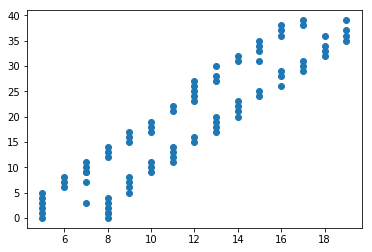

In [24]:
plt.figure()
plt.scatter((x[::-1]),y)
plt.show()

In [42]:
X = x[::-1]
sort = []
for j in range(0,len(x)):
    for jj in range(j,len(x)):
        if [X[jj],y[jj],j%2] not in sort:
            
        dist = np.sqrt((X[j] - X[jj])**2 + (y[j] - y[jj])**2)
        if dist <= np.sqrt(2):
            if [X[jj],y[jj],j%2] not in sort or [X[jj],y[jj],1] not in sort:
                sort.append([X[jj],y[jj],(j%2)])
            else:
                pass
        else:
            pass

In [43]:
sort

[[8, 0, 0],
 [8, 1, 0],
 [8, 1, 0],
 [5, 0, 1],
 [5, 1, 1],
 [8, 1, 0],
 [8, 1, 0],
 [8, 2, 0],
 [5, 1, 1],
 [5, 2, 1],
 [8, 1, 0],
 [8, 2, 0],
 [5, 2, 1],
 [5, 3, 1],
 [8, 2, 0],
 [7, 3, 0],
 [8, 3, 0],
 [7, 3, 1],
 [8, 3, 1],
 [8, 4, 1],
 [5, 3, 0],
 [5, 4, 0],
 [8, 4, 1],
 [5, 4, 0],
 [5, 5, 0],
 [8, 4, 1],
 [9, 5, 1],
 [5, 5, 0],
 [6, 6, 0],
 [9, 5, 1],
 [9, 6, 1],
 [6, 6, 0],
 [6, 7, 0],
 [7, 7, 0],
 [9, 6, 1],
 [9, 7, 1],
 [6, 7, 0],
 [7, 7, 0],
 [6, 8, 0],
 [9, 7, 1],
 [9, 8, 1],
 [7, 7, 0],
 [6, 8, 0],
 [6, 8, 1],
 [7, 9, 1],
 [7, 9, 1],
 [9, 8, 0],
 [10, 9, 0],
 [7, 9, 1],
 [7, 9, 1],
 [7, 10, 1],
 [10, 9, 0],
 [10, 10, 0],
 [7, 9, 1],
 [7, 10, 1],
 [10, 10, 0],
 [10, 11, 0],
 [11, 11, 0],
 [7, 10, 1],
 [7, 11, 1],
 [10, 11, 0],
 [11, 11, 0],
 [11, 12, 0],
 [7, 11, 1],
 [8, 12, 1],
 [11, 11, 0],
 [11, 12, 0],
 [8, 12, 1],
 [8, 13, 1],
 [11, 12, 0],
 [11, 13, 0],
 [8, 13, 1],
 [8, 14, 1],
 [11, 13, 0],
 [11, 14, 0],
 [8, 14, 1],
 [9, 15, 1],
 [11, 14, 0],
 [12, 15, 0],
 [9, 15,

In [17]:
right_line = []
left_line = []
for point in sort:
    if point[2] == 0:
        right_line.append
        

[[8, 0, 0],
 [8, 1, 0],
 [5, 0, 1],
 [5, 1, 1],
 [8, 2, 0],
 [5, 2, 1],
 [5, 3, 1],
 [7, 3, 0],
 [8, 3, 0],
 [7, 3, 1],
 [8, 3, 1],
 [8, 4, 1],
 [5, 3, 0],
 [5, 4, 0],
 [5, 5, 0],
 [9, 5, 1],
 [6, 6, 0],
 [9, 6, 1],
 [6, 7, 0],
 [7, 7, 0],
 [9, 7, 1],
 [6, 8, 0],
 [9, 8, 1],
 [6, 8, 1],
 [7, 9, 1],
 [9, 8, 0],
 [10, 9, 0],
 [7, 10, 1],
 [10, 10, 0],
 [10, 11, 0],
 [11, 11, 0],
 [7, 11, 1],
 [11, 12, 0],
 [8, 12, 1],
 [8, 13, 1],
 [11, 13, 0],
 [8, 14, 1],
 [11, 14, 0],
 [9, 15, 1],
 [12, 15, 0],
 [9, 16, 1],
 [12, 16, 0],
 [9, 17, 1],
 [10, 17, 1],
 [13, 17, 0],
 [10, 18, 1],
 [13, 18, 0],
 [13, 19, 0],
 [10, 19, 1],
 [14, 20, 0],
 [13, 20, 0],
 [14, 21, 0],
 [13, 20, 1],
 [14, 21, 1],
 [11, 21, 0],
 [11, 22, 0],
 [14, 22, 1],
 [12, 23, 0],
 [14, 23, 1],
 [12, 24, 0],
 [15, 24, 1],
 [12, 25, 0],
 [15, 25, 1],
 [12, 26, 0],
 [16, 26, 1],
 [13, 27, 0],
 [12, 27, 0],
 [13, 28, 0],
 [12, 27, 1],
 [13, 28, 1],
 [16, 28, 0],
 [17, 29, 0],
 [16, 29, 0],
 [17, 30, 0],
 [16, 29, 1],
 [17, 30, 1

In [17]:
regr = linmod.LinearRegression()